### Performance Metrics Clustering-Silhouetter Coefficient

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


In [2]:
pwd

'C:\\Users\\chand\\OneDrive\\Desktop\\Kmeans'

In [55]:
import pandas as pd
df = pd.read_csv(r"C:\Users\chand\OneDrive\Desktop\Acoustic\Kmeans\voiced\word_vowels\Acoustic_word_vowels.csv")
# df.isna().sum()
# df = df.T
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11'], dtype='object')

In [56]:
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11
0,12.500000,54.166667,82.500000,14.583333,127.500000,63.750000,56.666667,10.416667,10.416667,273.125000,50.000000
1,25.000000,10.416667,16.666667,37.500000,339.166667,0.000000,10.416667,27.083333,0.000000,106.666667,383.333333
2,78.750000,29.166667,10.416667,8.333333,0.000000,0.000000,0.000000,0.000000,8.333333,0.000000,0.000000
3,467.500000,266.875000,14.583333,41.875000,12.500000,25.000000,16.666667,0.000000,0.000000,22.916667,24.166667
4,0.000000,0.000000,0.000000,0.000000,25.000000,33.333333,0.000000,186.666667,127.500000,31.250000,8.333333
5,0.000000,53.125000,0.000000,0.000000,18.750000,0.000000,27.083333,150.000000,371.250000,0.000000,0.000000
6,0.000000,10.416667,10.416667,31.250000,14.583333,0.000000,0.000000,0.000000,0.000000,16.666667,0.000000
7,0.000000,45.833333,408.333333,465.000000,62.500000,0.000000,10.416667,0.000000,12.500000,66.666667,18.750000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.333333,0.000000,0.000000,0.000000,16.666667
9,16.666667,0.000000,12.500000,0.000000,16.666667,204.166667,75.000000,72.500000,14.583333,14.583333,10.416667


In [5]:
df.fillna(0,inplace = True)

In [6]:
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11
0,12.500000,54.166667,82.500000,14.583333,127.500000,63.750000,56.666667,10.416667,10.416667,273.125000,50.000000
1,25.000000,10.416667,16.666667,37.500000,339.166667,0.000000,10.416667,27.083333,0.000000,106.666667,383.333333
2,78.750000,29.166667,10.416667,8.333333,0.000000,0.000000,0.000000,0.000000,8.333333,0.000000,0.000000
3,467.500000,266.875000,14.583333,41.875000,12.500000,25.000000,16.666667,0.000000,0.000000,22.916667,24.166667
4,0.000000,0.000000,0.000000,0.000000,25.000000,33.333333,0.000000,186.666667,127.500000,31.250000,8.333333
5,0.000000,53.125000,0.000000,0.000000,18.750000,0.000000,27.083333,150.000000,371.250000,0.000000,0.000000
6,0.000000,10.416667,10.416667,31.250000,14.583333,0.000000,0.000000,0.000000,0.000000,16.666667,0.000000
7,0.000000,45.833333,408.333333,465.000000,62.500000,0.000000,10.416667,0.000000,12.500000,66.666667,18.750000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.333333,0.000000,0.000000,0.000000,16.666667
9,16.666667,0.000000,12.500000,0.000000,16.666667,204.166667,75.000000,72.500000,14.583333,14.583333,10.416667


In [7]:
df.isna().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
dtype: int64

In [57]:
import numpy as np
X = np.array(df.values)
X.shape

(11, 11)

In [58]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
# X, y = make_blobs(n_samples=500,
#                   n_features=2,
#                   centers=4,
#                   cluster_std=1,
#                   center_box=(-10.0, 10.0),
#                   shuffle=True,
#                   random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

In [59]:
X.shape

(11, 11)

In [60]:
import warnings
warnings.filterwarnings('ignore')

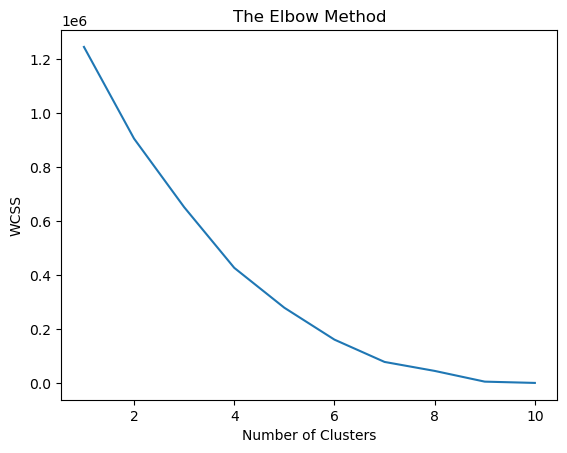

In [61]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [62]:
clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(X)
print(cluster_labels)

[0 3 0 1 0 0 0 2 0 0 0]


For n_clusters = 2 The average silhouette_score is : 0.3549115368376459
For n_clusters = 3 The average silhouette_score is : 0.30461796916911904
For n_clusters = 4 The average silhouette_score is : 0.28980902796123853
For n_clusters = 5 The average silhouette_score is : 0.22418379788343765
For n_clusters = 6 The average silhouette_score is : 0.19469281018713283


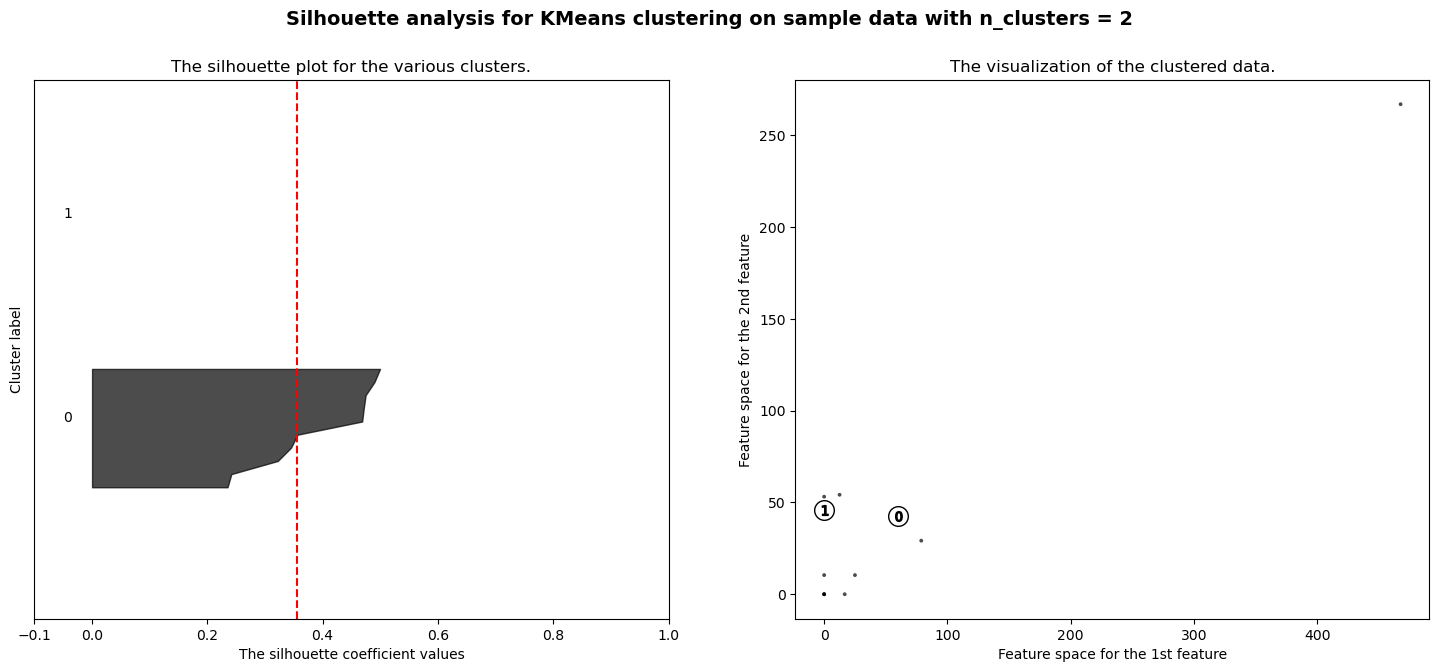

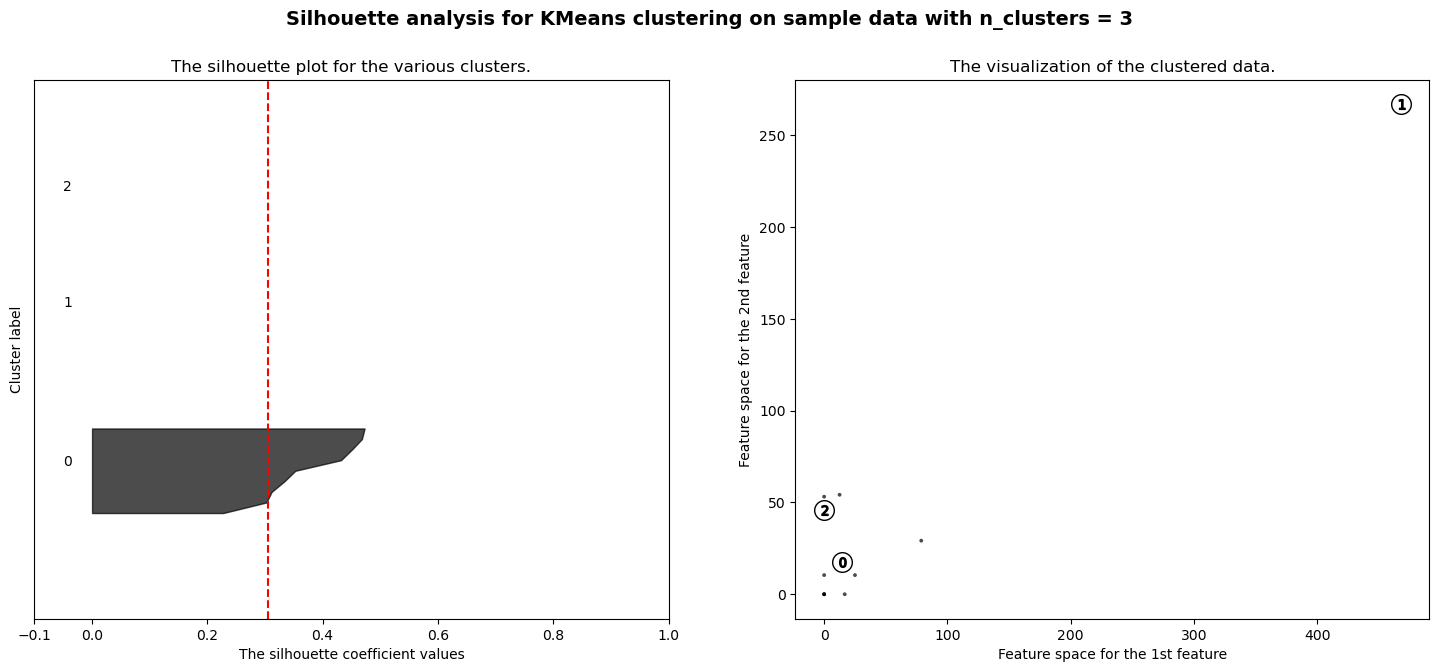

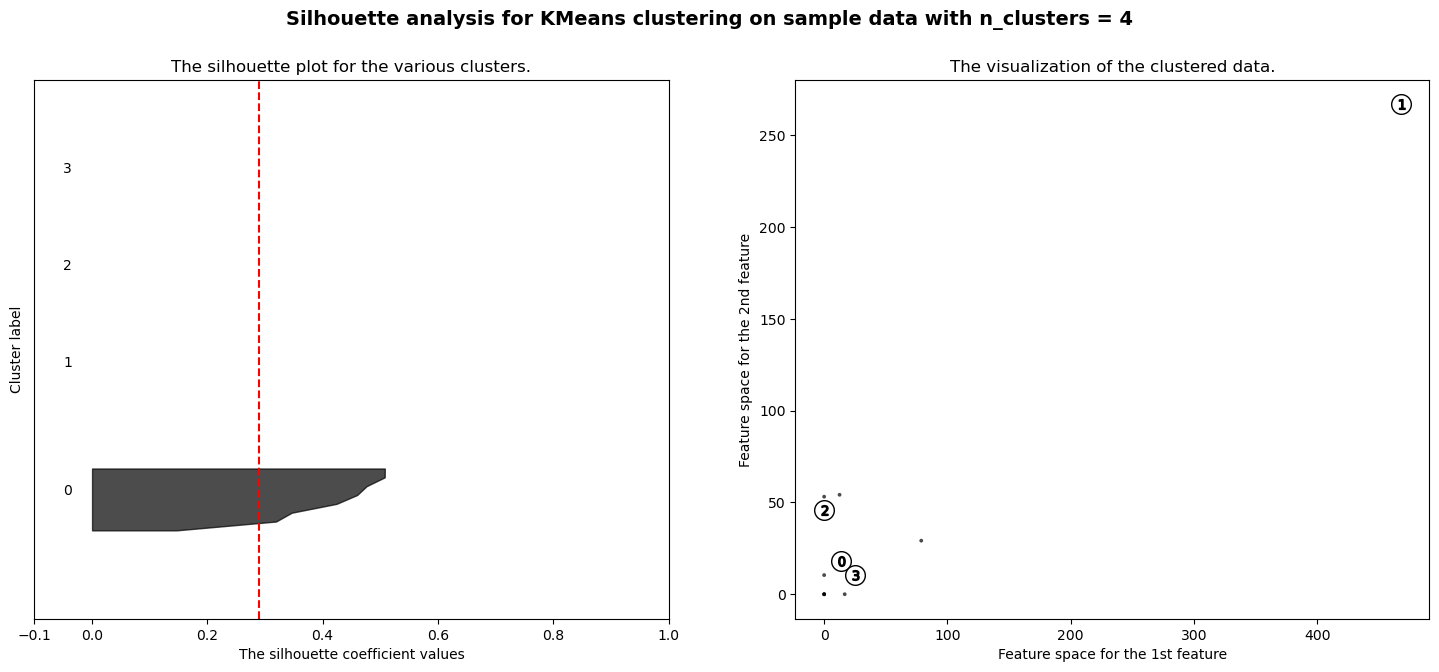

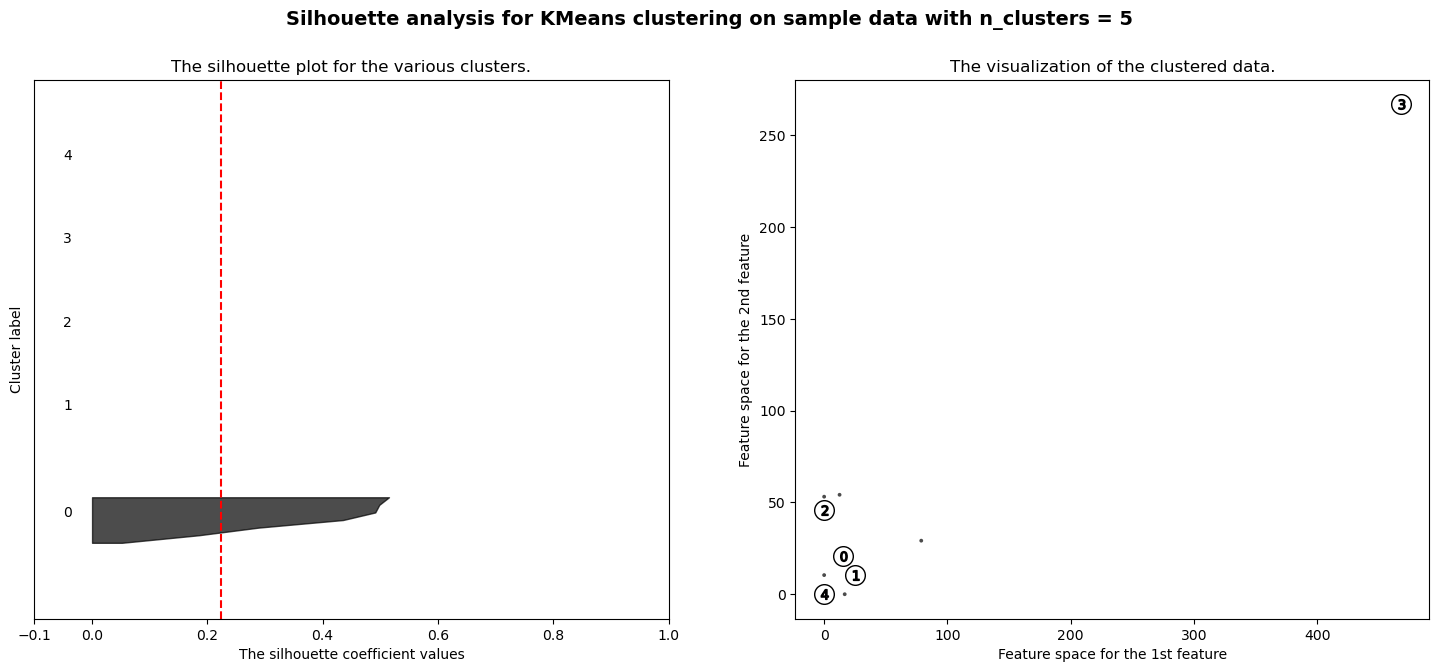

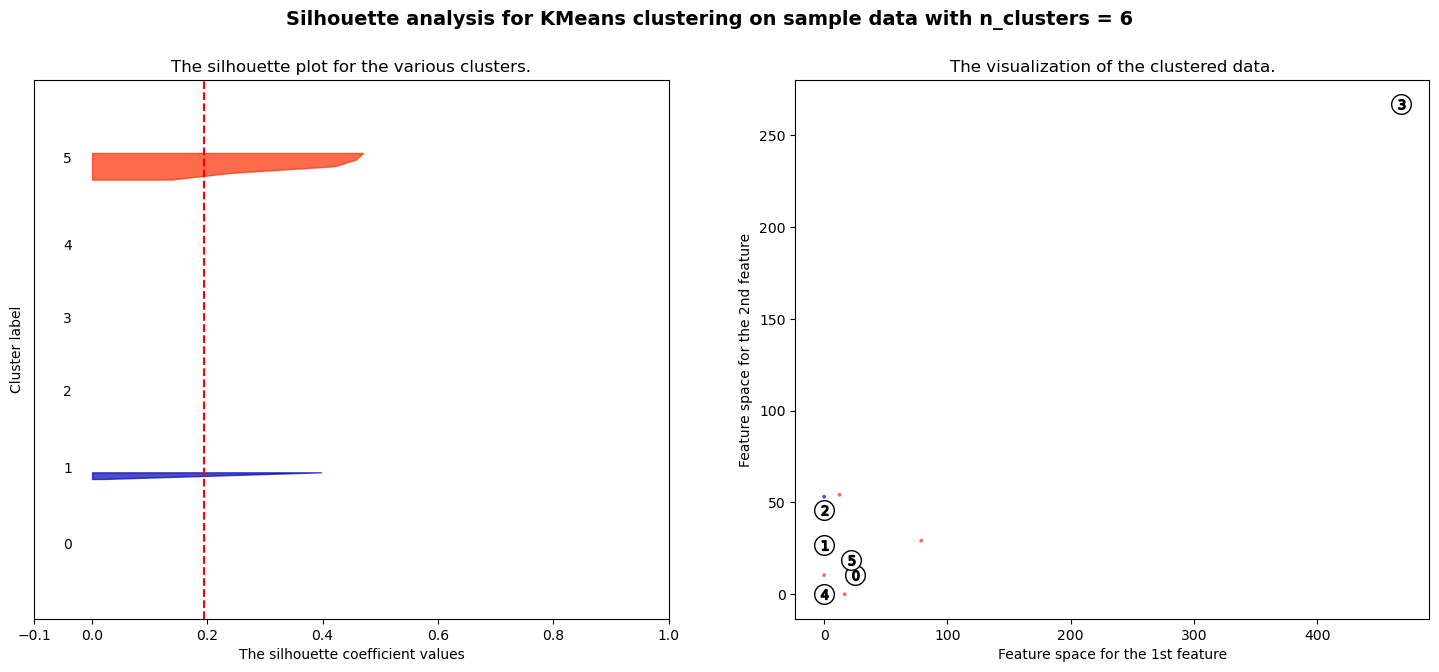

In [63]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [68]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
kmeans_model = KMeans(n_clusters=5, random_state=1).fit(X)
labels = kmeans_model.labels_
a=metrics.silhouette_score(X, labels, metric='euclidean')
b=metrics.calinski_harabasz_score(X, labels)
c=metrics.davies_bouldin_score(X, labels)
print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels))
print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(X, labels))
print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(X, labels))

Silhouette Coefficient: 0.224
Calinski-Harabasz Index: 5.185
Davies-Bouldin Index: 0.387


# DTW4

In [69]:
dset4=pd.DataFrame()
for i in range(100):
    dset4=pd.concat([dset4,df.sample(4)])

In [70]:
dset4.shape

(400, 11)

In [71]:
dset4

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11
3,467.500000,266.875000,14.583333,41.875000,12.500000,25.000000,16.666667,0.000000,0.000000,22.916667,24.166667
2,78.750000,29.166667,10.416667,8.333333,0.000000,0.000000,0.000000,0.000000,8.333333,0.000000,0.000000
0,12.500000,54.166667,82.500000,14.583333,127.500000,63.750000,56.666667,10.416667,10.416667,273.125000,50.000000
9,16.666667,0.000000,12.500000,0.000000,16.666667,204.166667,75.000000,72.500000,14.583333,14.583333,10.416667
6,0.000000,10.416667,10.416667,31.250000,14.583333,0.000000,0.000000,0.000000,0.000000,16.666667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
3,467.500000,266.875000,14.583333,41.875000,12.500000,25.000000,16.666667,0.000000,0.000000,22.916667,24.166667
9,16.666667,0.000000,12.500000,0.000000,16.666667,204.166667,75.000000,72.500000,14.583333,14.583333,10.416667
1,25.000000,10.416667,16.666667,37.500000,339.166667,0.000000,10.416667,27.083333,0.000000,106.666667,383.333333
3,467.500000,266.875000,14.583333,41.875000,12.500000,25.000000,16.666667,0.000000,0.000000,22.916667,24.166667


In [23]:
range_n_clusters = [2, 3, 4, 5, 6]

In [72]:
import numpy as np
dset4= np.array(dset4.values)
dset4.shape

(400, 11)

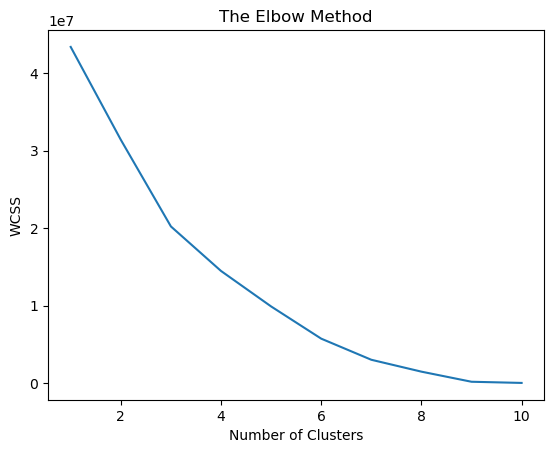

In [73]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(dset4)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5135378128948428
For n_clusters = 3 The average silhouette_score is : 0.5820748866078921
For n_clusters = 4 The average silhouette_score is : 0.5661474558706925
For n_clusters = 5 The average silhouette_score is : 0.5825072389791432
For n_clusters = 6 The average silhouette_score is : 0.6745311655693763


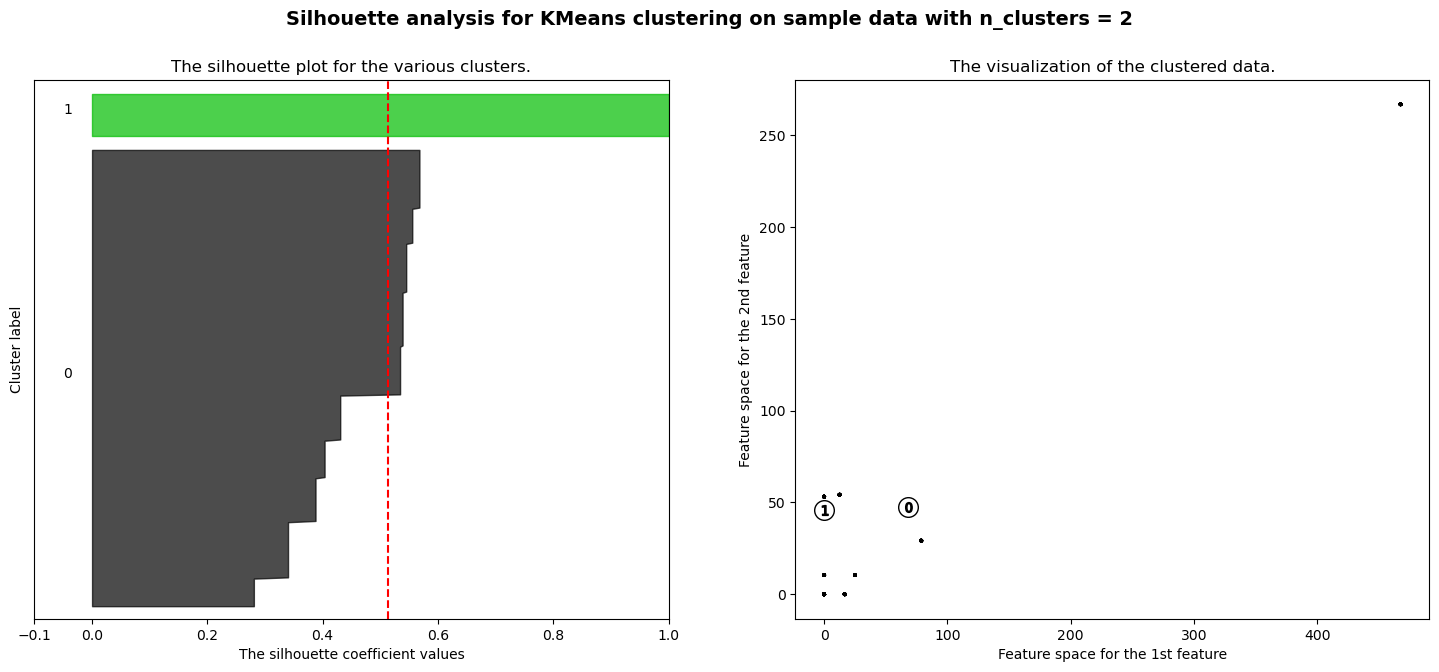

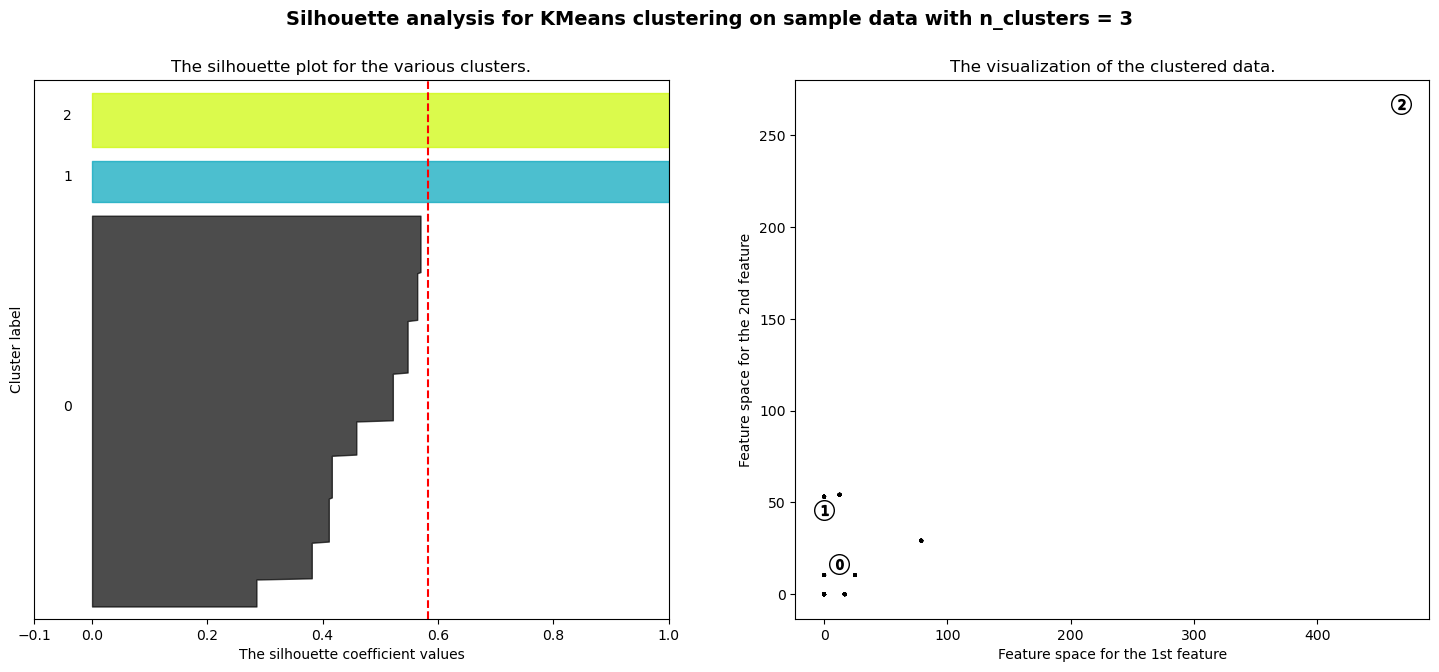

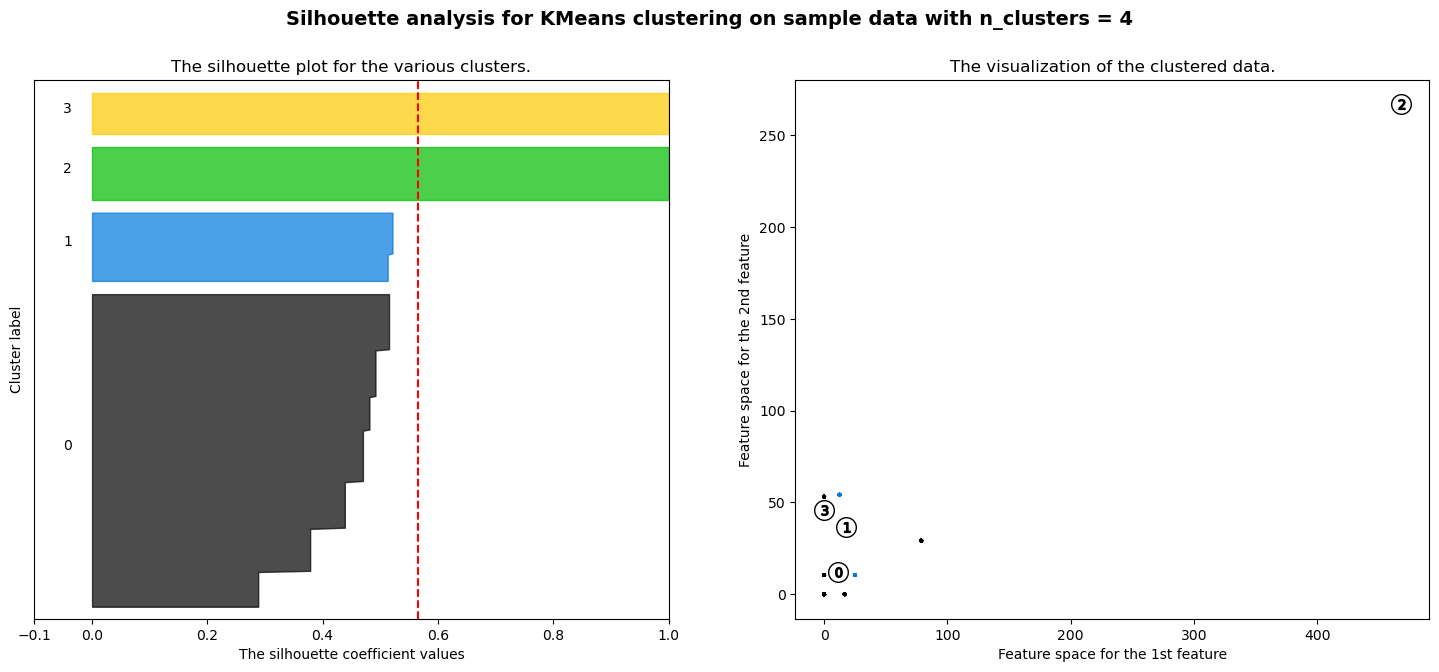

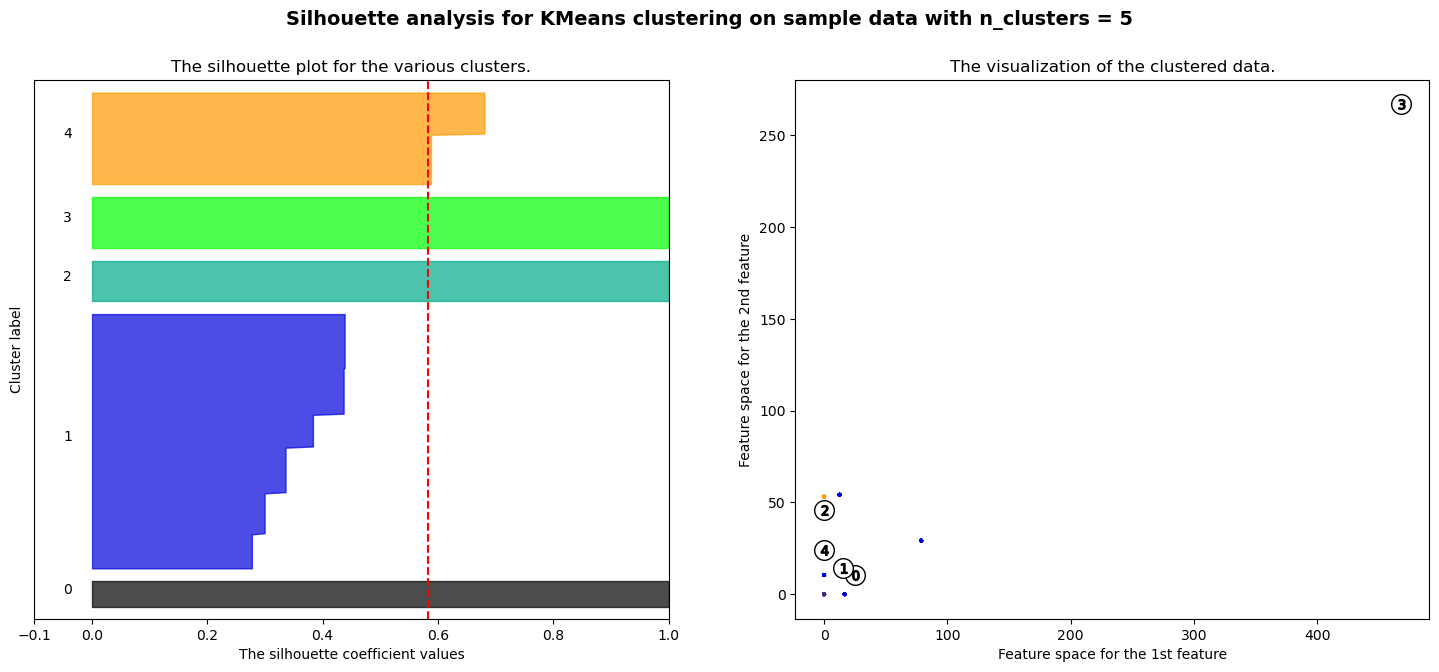

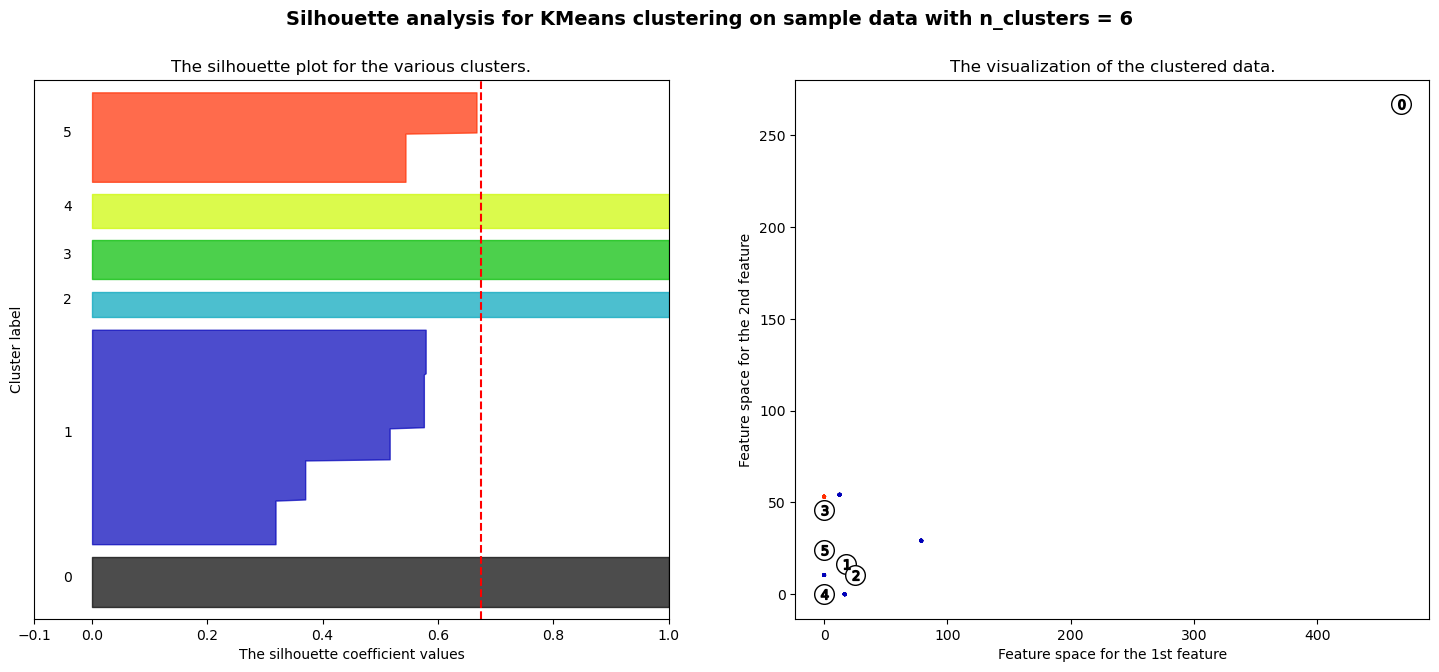

In [74]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dset4) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(dset4)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dset4, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dset4, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(dset4[:, 0], dset4[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [79]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
kmeans_model = KMeans(n_clusters=5, random_state=1).fit(dset4)
labels = kmeans_model.labels_
a=metrics.silhouette_score(dset4, labels, metric='euclidean')
b=metrics.calinski_harabasz_score(dset4, labels)
c=metrics.davies_bouldin_score(dset4, labels)
print("Silhouette Coefficient: %0.3f" % silhouette_score(dset4, labels))
print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(dset4, labels))
print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(dset4, labels))

Silhouette Coefficient: 0.604
Calinski-Harabasz Index: 338.436
Davies-Bouldin Index: 0.756


# DTW7


In [80]:
dset7=pd.DataFrame()
for i in range(100):
    dset7=pd.concat([dset7,df.sample(7)])

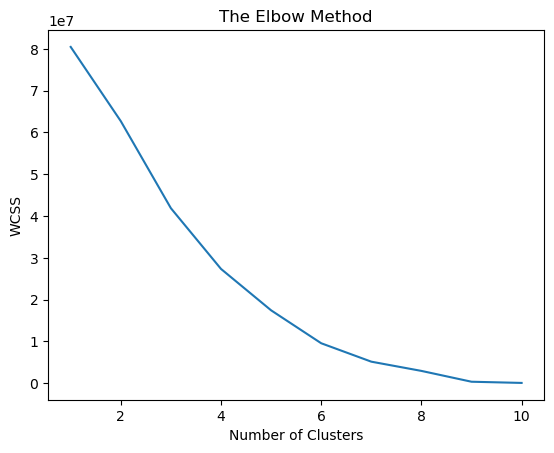

In [81]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(dset7)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [82]:
import numpy as np
dset7= np.array(dset7.values)
dset7.shape

(700, 11)

For n_clusters = 2 The average silhouette_score is : 0.4922383238303505
For n_clusters = 3 The average silhouette_score is : 0.5428838803700594
For n_clusters = 4 The average silhouette_score is : 0.6184812041785331
For n_clusters = 5 The average silhouette_score is : 0.6509660853842397
For n_clusters = 6 The average silhouette_score is : 0.6944230276909631


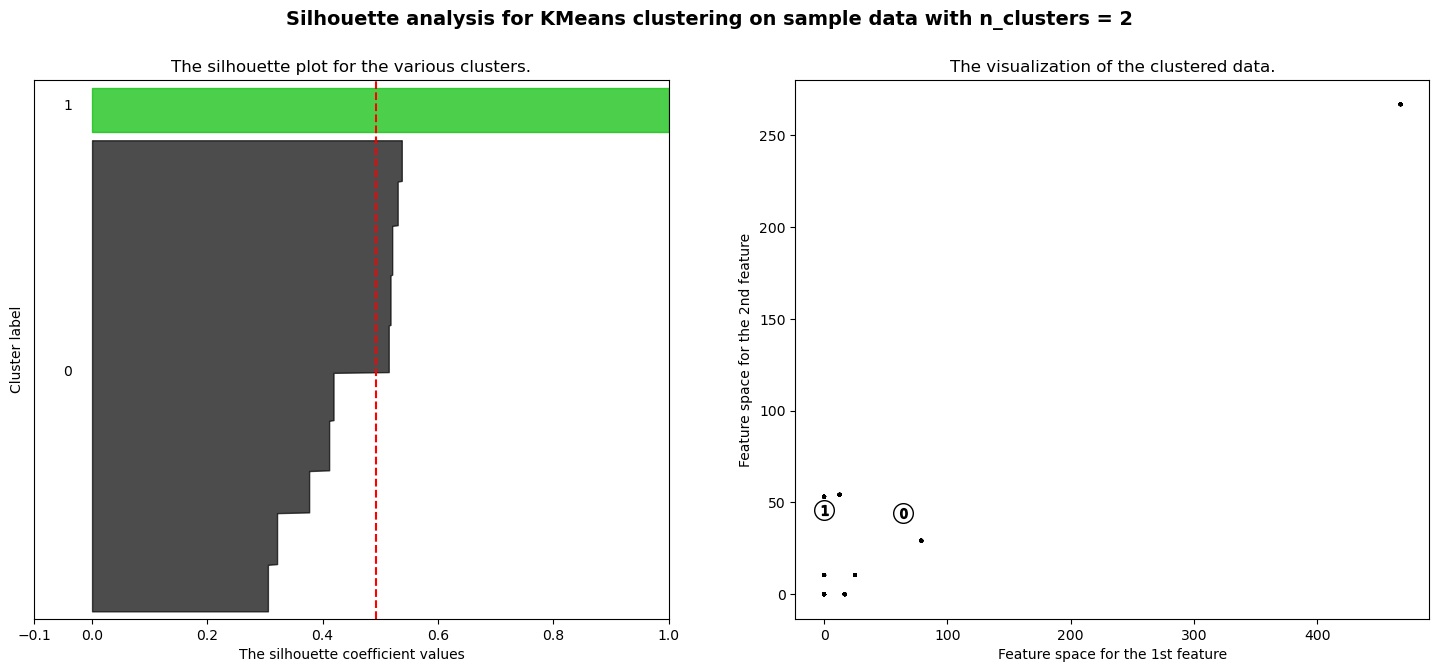

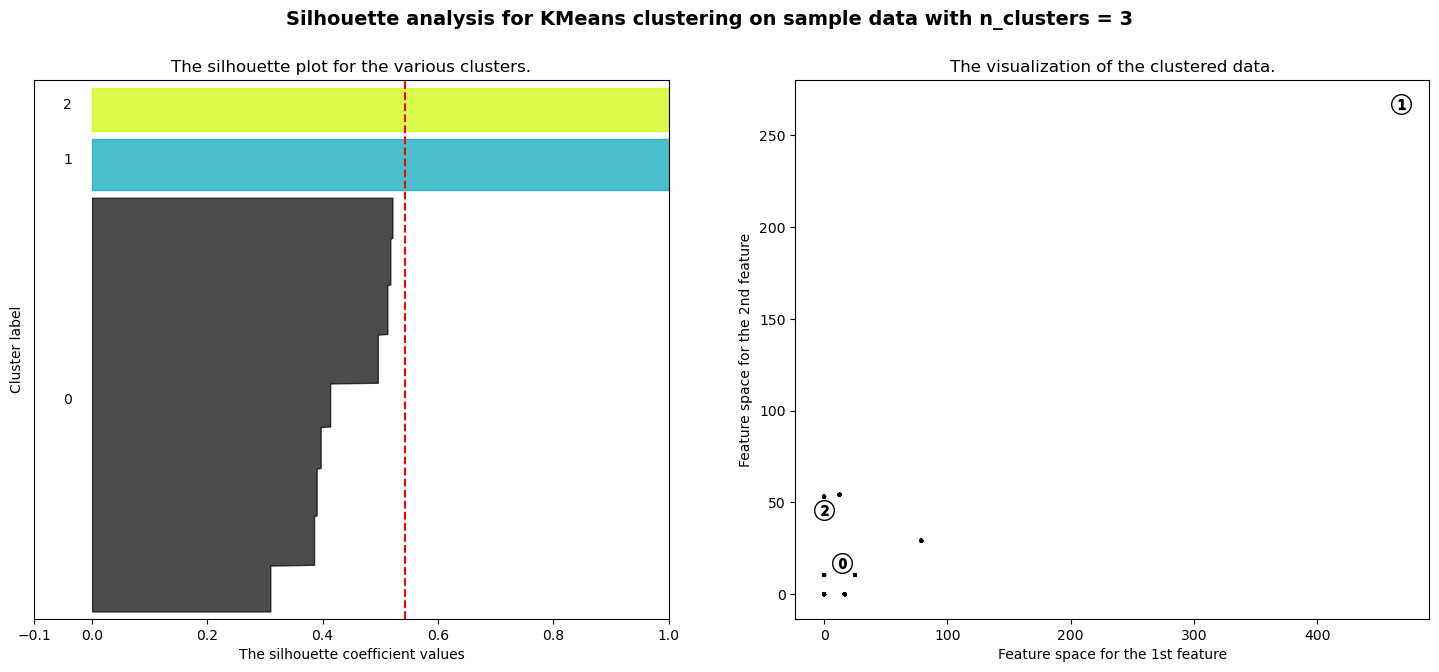

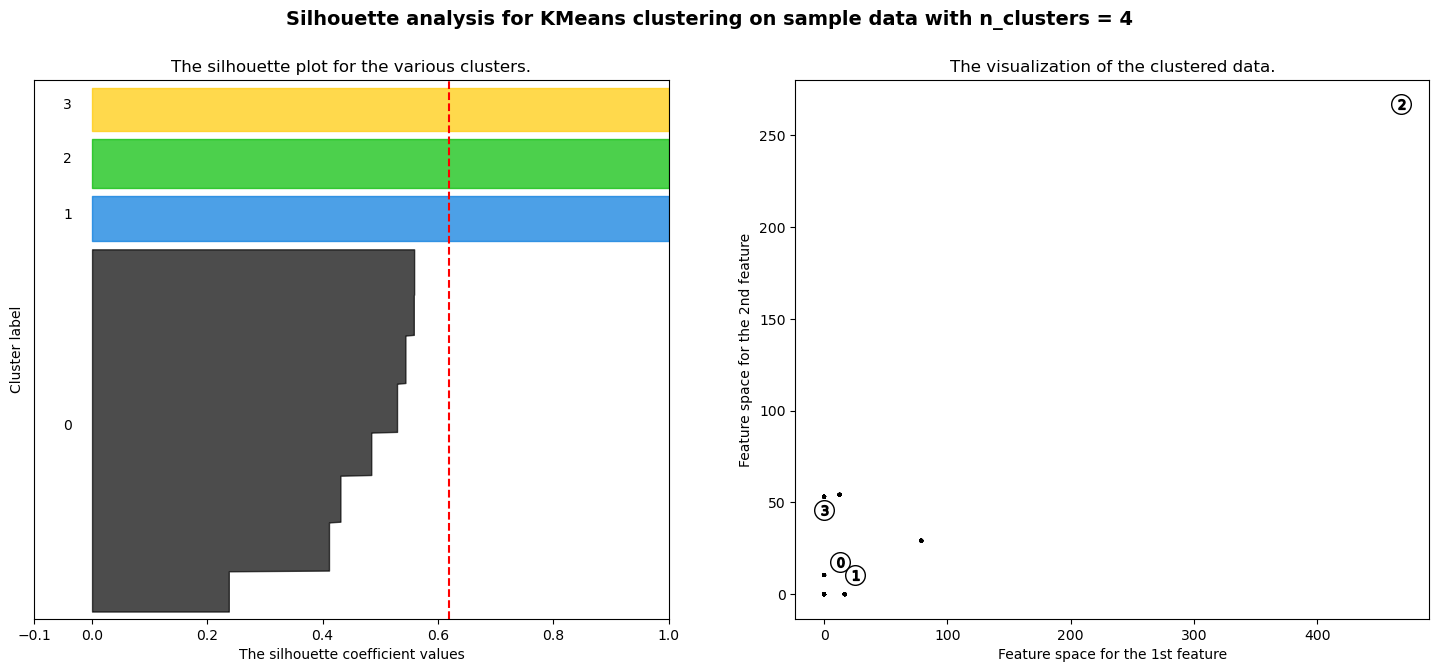

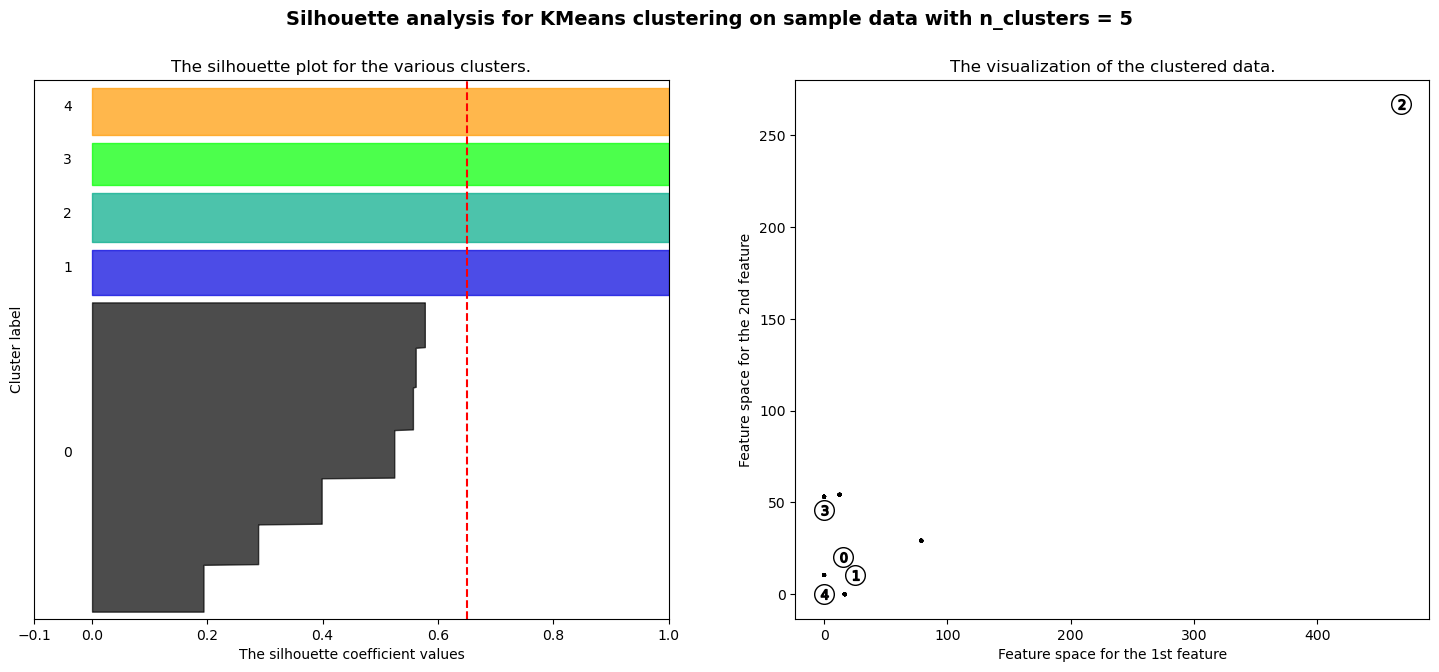

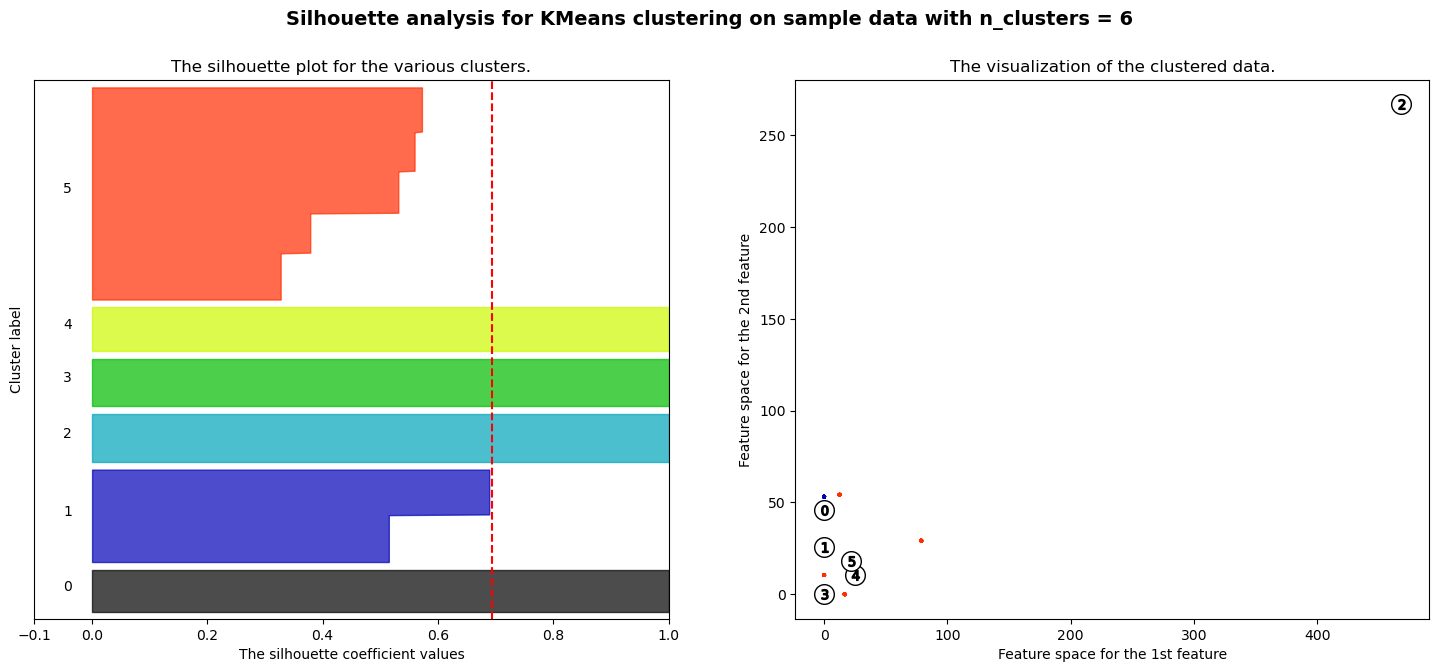

In [83]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dset7) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(dset7)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dset7, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dset7, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(dset7[:, 0], dset7[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [88]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
kmeans_model = KMeans(n_clusters=5, random_state=1).fit(dset7)
labels = kmeans_model.labels_
a=metrics.silhouette_score(dset7, labels, metric='euclidean')
b=metrics.calinski_harabasz_score(dset7, labels)
c=metrics.davies_bouldin_score(dset7, labels)
print("Silhouette Coefficient",a)
print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(dset7, labels))
print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(dset7, labels))

Silhouette Coefficient 0.6509660853842397
Calinski-Harabasz Index: 628.169
Davies-Bouldin Index: 0.387


# DTW10

In [91]:
dset10=pd.DataFrame()
for i in range(200):
    dset10=pd.concat([dset10,df.sample(10)])

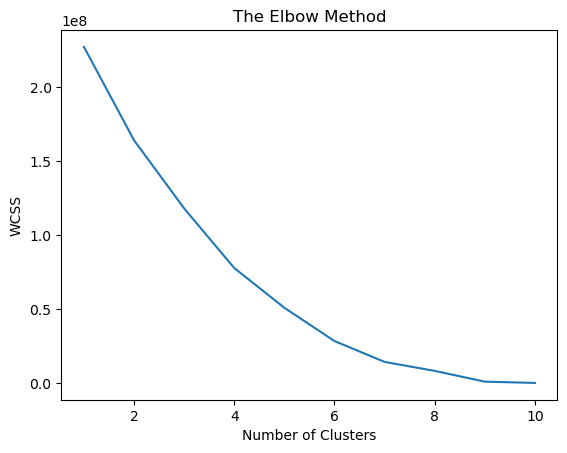

In [92]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(dset10)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [93]:
import numpy as np
dset10= np.array(dset10.values)
dset10.shape

(2000, 11)

For n_clusters = 2 The average silhouette_score is : 0.5023970184615765
For n_clusters = 3 The average silhouette_score is : 0.5140355043609379
For n_clusters = 4 The average silhouette_score is : 0.6165163860860214
For n_clusters = 5 The average silhouette_score is : 0.64533233054629
For n_clusters = 6 The average silhouette_score is : 0.6931897424868295


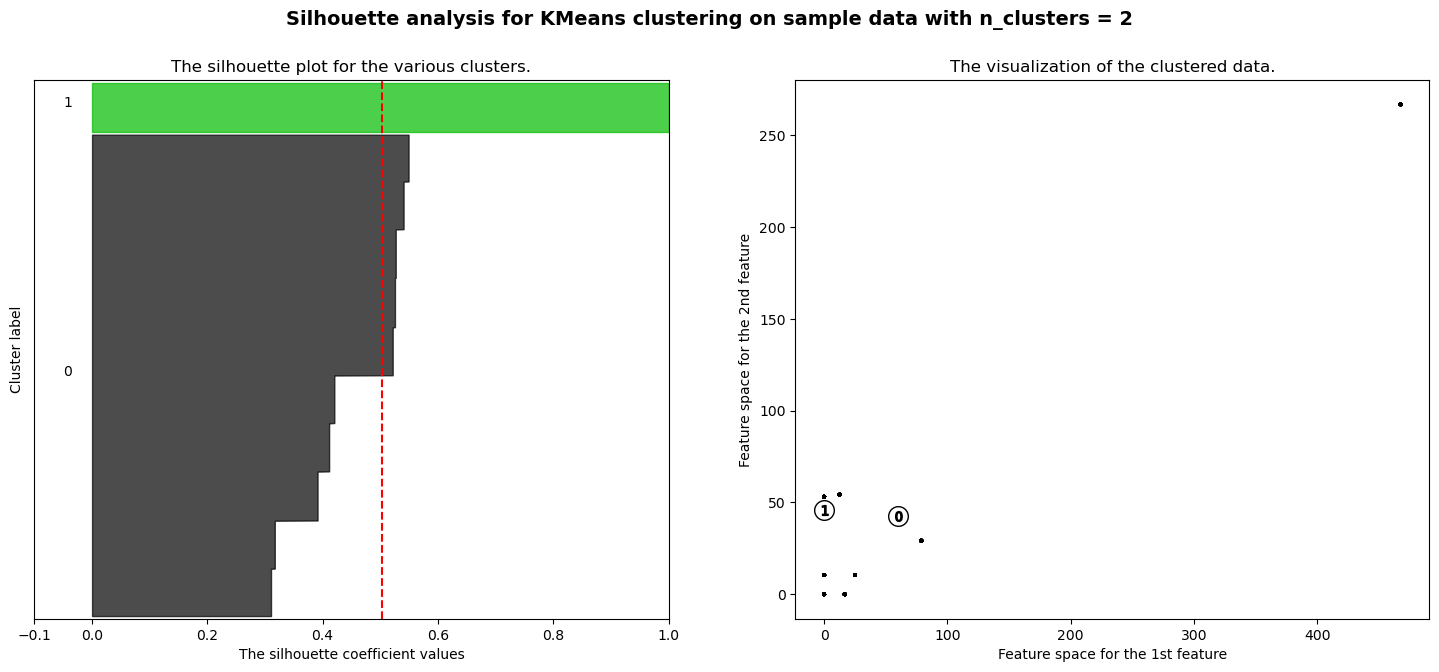

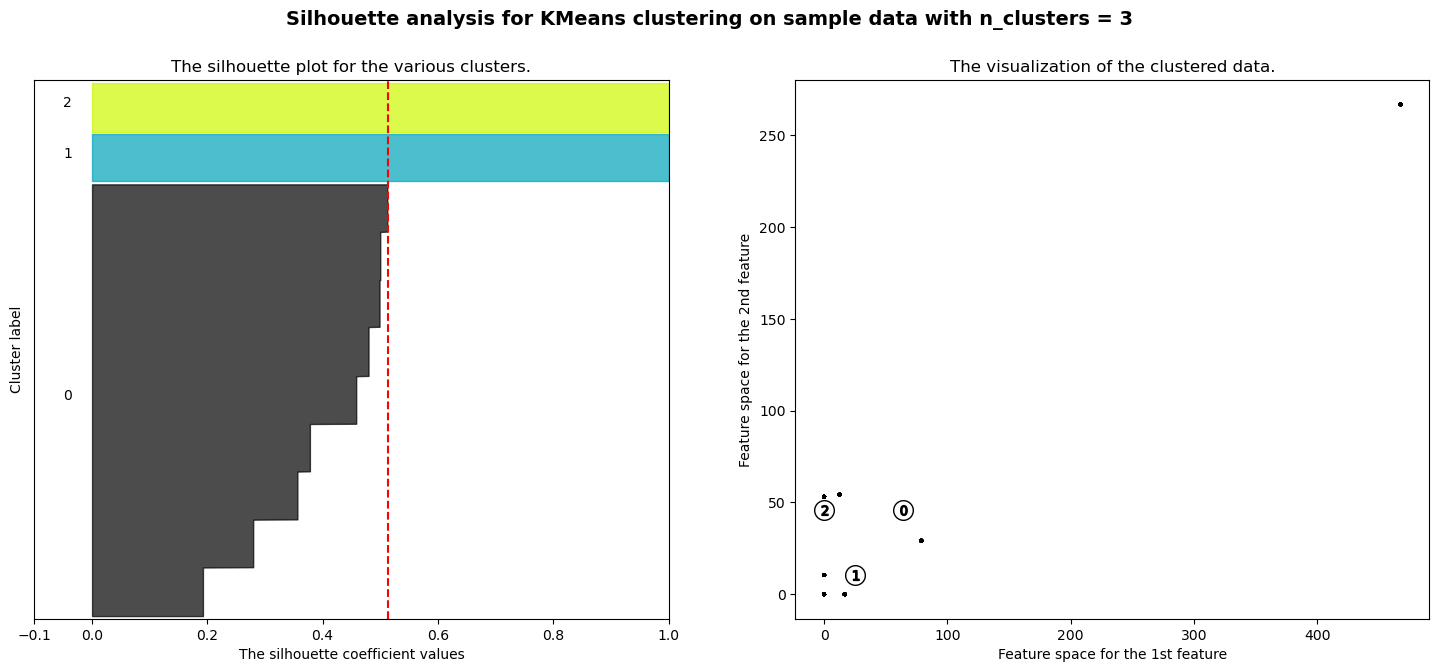

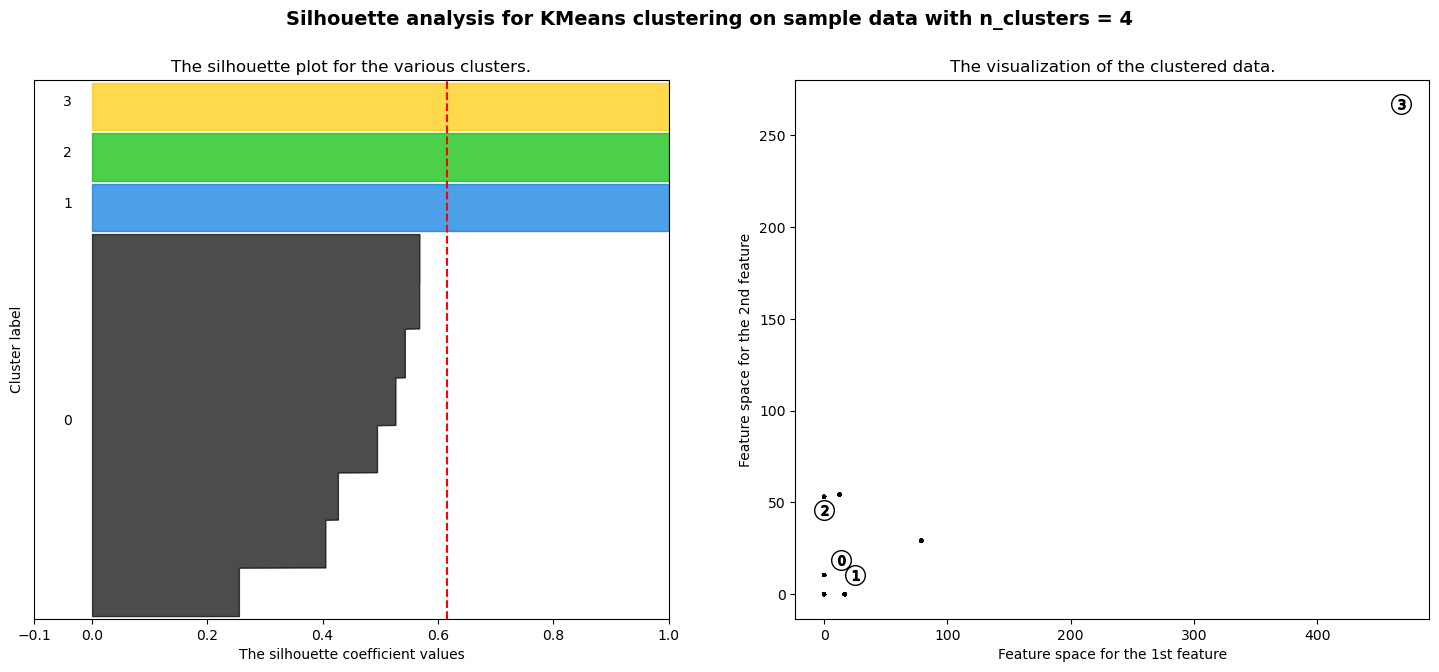

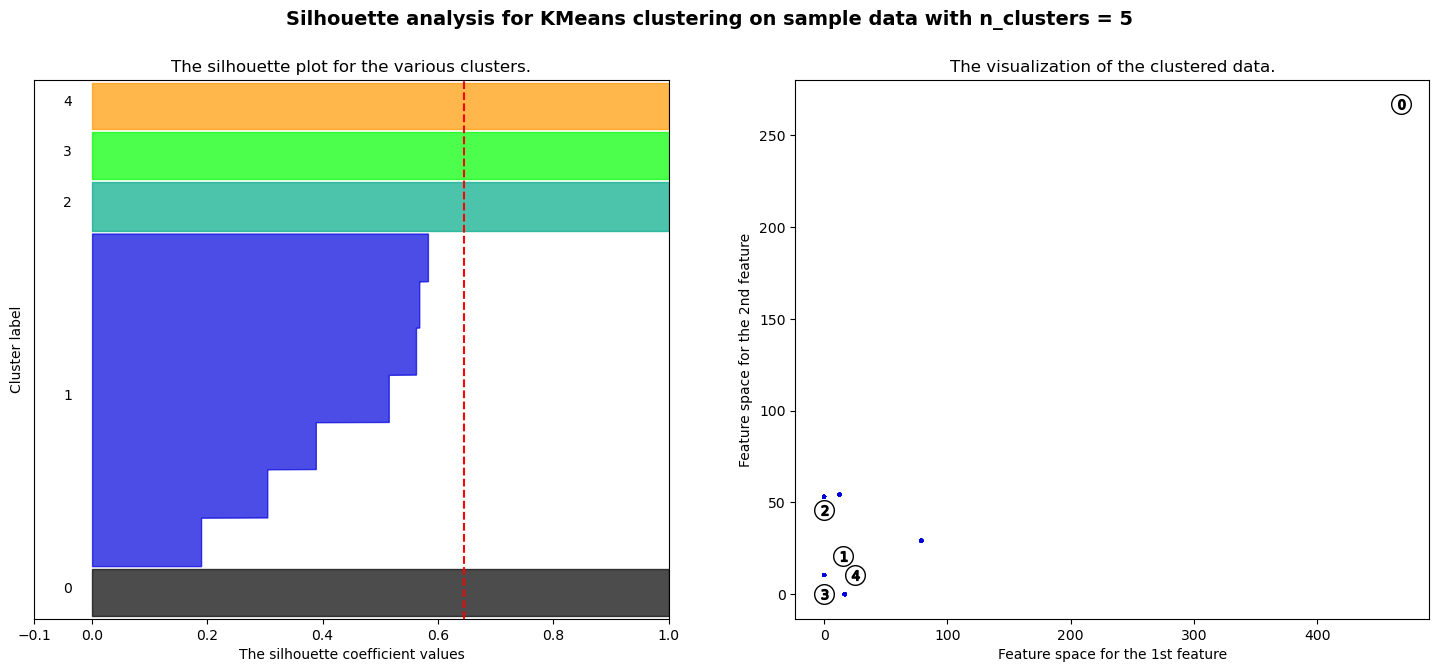

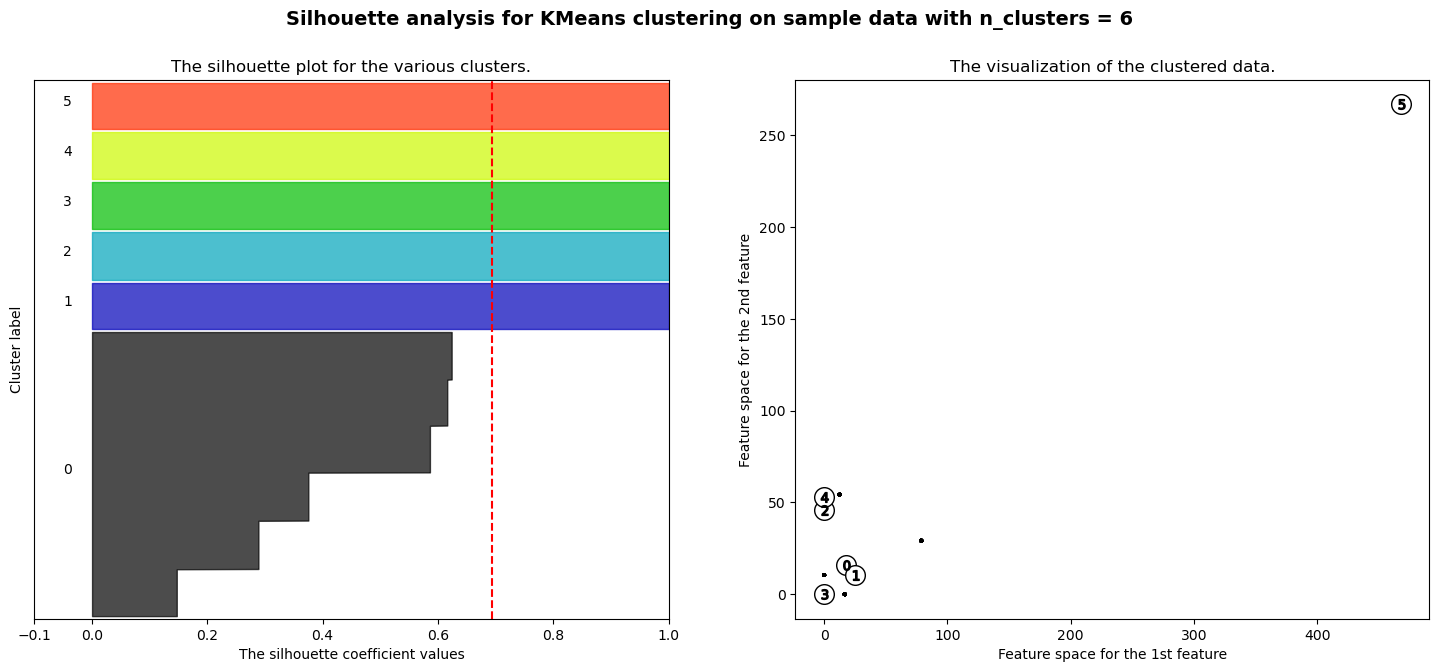

In [94]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dset10) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(dset10)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dset10, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dset10, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(dset10[:, 0], dset10[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [99]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
kmeans_model = KMeans(n_clusters=5, random_state=1).fit(dset10)
labels = kmeans_model.labels_
a=metrics.silhouette_score(dset10, labels, metric='euclidean')
b=metrics.calinski_harabasz_score(dset10, labels)
c=metrics.davies_bouldin_score(dset10, labels)
print("Silhouette Coefficient",a)
print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(dset10, labels))
print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(dset10, labels))

Silhouette Coefficient 0.64533233054629
Calinski-Harabasz Index: 1724.809
Davies-Bouldin Index: 0.388
